# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
/Google_Stock_Price_Train.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [9]:
dataset_train = pd.read_csv('/Google_Stock_Price_Train.csv')
print(dataset_train.head(10))
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)


        Date    Open    High     Low   Close      Volume
0   1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1   1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2   1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3   1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4   1/9/2012  322.04  322.29  309.46  620.76  11,688,800
5  1/10/2012  313.70  315.72  307.30  621.43   8,824,000
6  1/11/2012  310.59  313.52  309.40  624.25   4,817,800
7  1/12/2012  314.43  315.26  312.08  627.92   3,764,400
8  1/13/2012  311.96  312.30  309.37  623.28   4,631,800
9  1/17/2012  314.81  314.81  311.67  626.86   3,832,800
[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


### Creating a data structure with 60 timesteps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [13]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [18]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

### Fitting the RNN to the Training set

In [28]:
regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
38/38 [==============================] - 1s 15ms/step - loss: 0.0014 - accuracy: 0.0017
Epoch 2/150
38/38 [==============================] - 1s 13ms/step - loss: 0.0013 - accuracy: 0.0017
Epoch 3/150
38/38 [==============================] - 1s 13ms/step - loss: 0.0013 - accuracy: 0.0017
Epoch 4/150
38/38 [==============================] - 0s 13ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 5/150
38/38 [==============================] - 1s 13ms/step - loss: 0.0013 - accuracy: 0.0017
Epoch 6/150
38/38 [==============================] - 0s 13ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 7/150
38/38 [==============================] - 1s 13ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 8/150
38/38 [==============================] - 1s 13ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 9/150
38/38 [==============================] - 1s 13ms/step - loss: 0.0013 - accuracy: 0.0017
Epoch 10/150
38/38 [==============================] - 0s 13ms/step - loss: 0.0014 - accuracy: 0.0017

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [29]:
dataset_test = pd.read_csv('/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [30]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 25ms/step


### Visualising the results

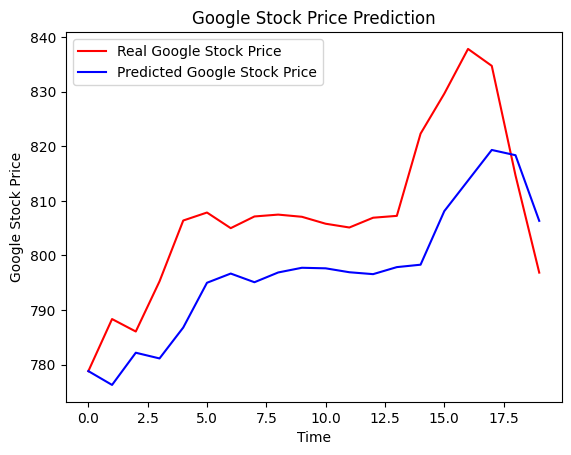

In [31]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

Evaluation with RMS


In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))